In [2]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_points(points, labels):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot()

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        class_member_mask = (labels == k)
        ax.plot(points[class_member_mask, 0], points[class_member_mask,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % len(unique_labels))
    plt.show()

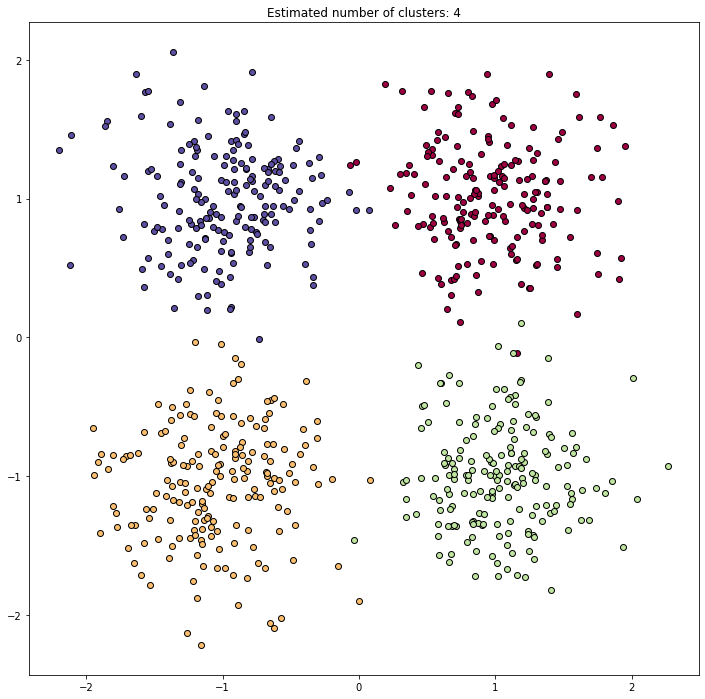

In [81]:
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
points, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plot_points(points, labels_true)

In [82]:
def DBSCANTorch(point_features, eps, numPts):
    pass

In [83]:
eps = 0.01
numPts = 5

point_features = torch.tensor(points).unsqueeze(0)

distance = torch.cdist(point_features,point_features)
neighbors = torch.where(distance<eps,1, 0)

count_neighbors = torch.count_nonzero(neighbors,2)
pred_labels = count_neighbors.clone()
pred_labels[count_neighbors<numPts] = -1
D = torch.diag(count_neighbors.squeeze())
L = D - neighbors.squeeze()
eigenvalues, eigenvectors = torch.linalg.eig(L.float())
# laplacian = co

tensor([-5.9604e-08,  1.0000e-12,  1.0000e-12,  1.0000e-12,  1.0000e-12,
         1.0000e-12,  1.0000e-12,  1.0000e-12,  1.0000e-12,  1.0000e-12])


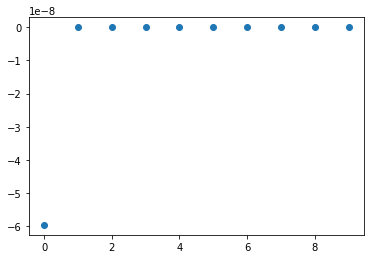

In [84]:
e = 1e-12+eigenvalues.float()
e_smallest = torch.topk(e,10,largest=False)[0]
print(e_smallest)
plt.scatter(list(range(e_smallest.shape[0])),e_smallest)